In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [37]:
dataset= keras.datasets.fashion_mnist

In [38]:
((imagens_treino, identificacoes_treino),(imagens_teste,identificacoes_teste))=dataset.load_data()

In [39]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

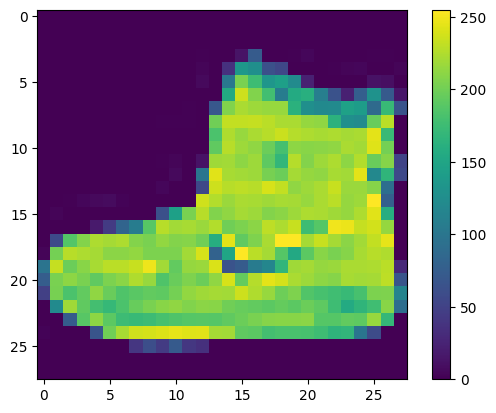

In [40]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [41]:
# Estas são as identificações (rótulos) correspondentes às imagens de treinamento.
#Cada identificação representa a classe à qual a imagem pertence (por exemplo, camiseta, calça, sapato, etc.).

identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [42]:
nomes_classificacoes=['Camiseta','Calça','Pullover','Vestido',
                      'Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

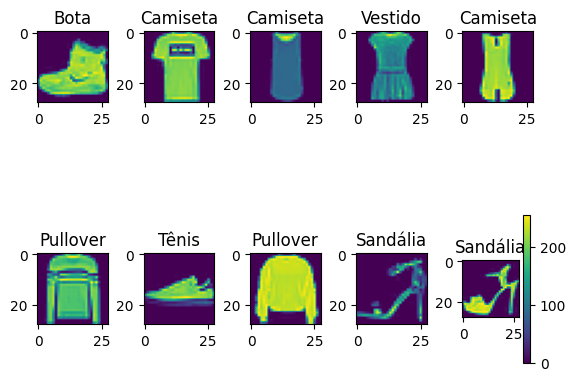

In [43]:
for imagem in range(10):
  # 2 linhas 5 colunas
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.colorbar()
plt.show()

In [44]:
#Quando a jogamos em nossa rede, estamos jogando algo que tem 28 por 28 posições,
#sendo que cada um dos valores que preenchem essa matriz de 28 linhas por 28 colunas está variando de 0 a 255.
#tentar reduzir este número; se variar de 0 a 1, melhor,
imagens_treino= imagens_treino / 255.0

In [51]:
#cria um modelo sequencial
#camadas são empilhadas uma após a outra em sequência.
modelo = keras.Sequential([
    # Primeira camada: Flatten
    # Transforma os dados de entrada (imagens 2D de 28x28 pixels) em um vetor unidimensional (achatado).
    keras.layers.Flatten(input_shape=(28,28)),
    # Segunda camada: Dense (totalmente conectada)
    # Define uma camada densamente conectada com 256 neuronios.
    #activation=tf.nn.relu: argumento que define a função de ativação
    # função ReLU é uma função de ativação não linear que retorna zero para valores negativos e mantém os valores positivos inalterados.
    keras.layers.Dense(256,activation=tf.nn.relu),
    #andomly sets input units to 0 with a frequency of rate
    #at each step during training time, which helps prevent overfitting.
    keras.layers.Dropout(0.2),
    #softmax via falar a probabilidade que as roupas pertencerem a certas categorias
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [52]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historico=modelo.fit(imagens_treino,identificacoes_treino,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5344 - accuracy: 0.8097 - val_loss: 0.4234 - val_accuracy: 0.8447
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3992 - accuracy: 0.8544 - val_loss: 0.3676 - val_accuracy: 0.8689
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3608 - accuracy: 0.8670 - val_loss: 0.3461 - val_accuracy: 0.8762
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3407 - accuracy: 0.8745 - val_loss: 0.3382 - val_accuracy: 0.8736
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3253 - accuracy: 0.8792 - val_loss: 0.3372 - val_accuracy: 0.8800


In [55]:
modelo.save('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
modelo_salvo= load_model('modelo.h5')

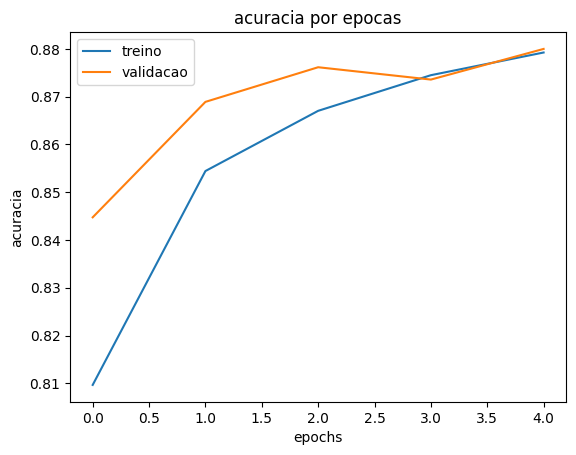

In [53]:
#se o treino estiver melhor que a validacao o modelo esta tendo um overfitting
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('acuracia por epocas')
plt.xlabel('epochs')
plt.ylabel('acuracia')
plt.legend(['treino','validacao'])

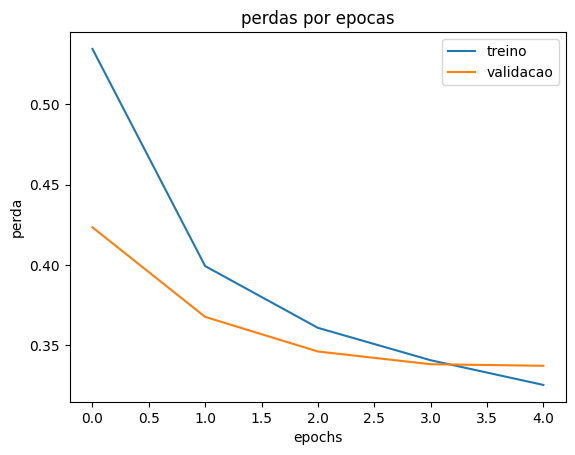

In [54]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perdas por epocas')
plt.xlabel('epochs')
plt.ylabel('perda')
plt.legend(['treino','validacao'])

In [62]:
testes= modelo.predict(imagens_teste)
np.argmax(testes[0])
print('resultados' ,np.argmax(testes[1]))
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultados' ,np.argmax(testes_modelo_salvo[1]))

313/313 [==============================] - 1s 3ms/step
resultados 2
313/313 [==============================] - 1s 2ms/step
resultados 2


In [60]:
perda_teste, acuracia_teste=modelo.evaluate(imagens_teste,identificacoes_teste)
print('Perda do teste', perda_teste)
print('acuracia',acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 57.3056 - accuracy: 0.8491
Perda do teste 57.30558776855469
acuracia 0.8490999937057495
